# Near state of the Results
https://arxiv.org/pdf/1412.6806.pdf - Striving for simplicity: The All Convolutional Net
http://rodrigob.github.io/are_we_there_yet/build/classification_datasets_results.html#43494641522d3130 - CIFAR10 Dataset's results
All Convolutional Net is the second best performing model for the Object Recognition today.

In this project we'll learn to:
* Import datasets from keras
* Use one-hot vectors for categorical labels
* Add layers to a kernel model
* Load pre-trained weights
* Make predictions using a trained keras model


In [2]:
from keras.datasets import cifar10
from keras.utils import np_utils
from matplotlib import pyplot as plt
import numpy as np
from PIL import Image

In [3]:
# load the data
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

170500096/170498071 [==============================] - 274s 2us/step


In [4]:
# lets determin the dataset characteristics
print('Training Images: {}'.format(X_train.shape))
print('Testing Images: {}'.format(X_test.shape))

# A single image:
print(X_train[0].shape)

Training Images: (50000, 32, 32, 3)
Testing Images: (10000, 32, 32, 3)
(32, 32, 3)


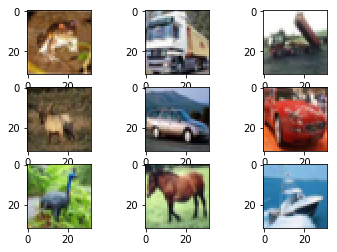

In [5]:
# Create a grid of 3x3 images
for i in range(0, 9):
    plt.subplot(330 + 1 + i)
    img = X_train[i]
    plt.imshow(img)
    
# show the plot
plt.show()

In [6]:
# Preprocessing dataset

# fix random seed for reproducability
seed = 6
np.random.seed(seed)

# load the data
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

# normalize the data from 0-255 to 0.0-1.0
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

X_train /= 255.0
X_test /= 255.0

In [9]:
# class labels shape
print(y_train.shape)
print(y_train[0])

(50000, 1)
[6]


In [10]:
# [6] => [0, 0, 0, 0, 0, 0, 1, 0, 0, 0] - One-hot vector

# hot encode outputs
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_class = y_test.shape[1]

print(num_class)
print(y_train.shape)
print(y_train[0])

10
(50000, 10)
[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


Table 1: The All-CNN network used for classification on CIFAR-10.
Model- C
* Input 32 × 32 RGB image
* 3 × 3 conv. 96 ReLU
* 3 × 3 conv. 96 ReLU
* 3 × 3 max-pooling stride 2
* 3 × 3 conv. 192 ReLU
* 3 × 3 conv. 192 ReLU
* 3 × 3 max-pooling stride 2
* 3 × 3 conv. 192 ReLU
* 1 × 1 conv. 192 ReLU
* 1 × 1 conv. 10 ReLU
* global averaging over 6 × 6 spatial dimensions
* 10 (or 100)-way softmax


In [14]:
# Start by importing necessary layers
from keras.models import Sequential
from keras.layers import Dropout, Activation, Conv2D, GlobalAveragePooling2D
from keras.optimizers import SGD

In [23]:
def allcnn(weights = None):
    
    # Define model type -Sequential
    model = Sequential()
    
    # add model layers
    model.add(Conv2D(96, (3, 3), padding = 'same', input_shape=(32, 32, 3)))
    model.add(Activation('relu'))
    model.add(Conv2D(96, (3, 3), padding = 'same'))
    model.add(Activation('relu'))
    model.add(Conv2D(96, (3, 3), padding = 'same', strides = (2, 2)))
    model.add(Dropout(0.5))
    
    model.add(Conv2D(192, (3, 3), padding = 'same'))
    model.add(Activation('relu'))
    model.add(Conv2D(192, (3, 3), padding = 'same'))
    model.add(Activation('relu'))
    model.add(Conv2D(192, (3, 3), padding = 'same', strides = (2, 2)))
    model.add(Dropout(0.5))
    
    model.add(Conv2D(192, (3, 3), padding = 'same'))
    model.add(Activation('relu'))
    model.add(Conv2D(192, (1, 1), padding = 'valid'))
    model.add(Activation('relu'))
    model.add(Conv2D(10, (1, 1), padding = 'valid'))
    
    # Add Global average pooling layer with softmax activation
    model.add(GlobalAveragePooling2D())
    model.add(Activation('softmax'))
    
    # load the weights
    if weights:
        model.load_weights(weights)
        
    # Return the model
    return model

In [24]:
# Define hyper parameters
learning_rate = 0.01
weight_decay = 1e-6
momentum = 0.9

# build the model
model = allcnn()

# define an optimizer and compile this model
sgd = SGD(lr=learning_rate, decay=weight_decay, momentum = momentum, nesterov=True)
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])

# print model summary
print(model.summary())

# Define additional training parameters
epochs = 350
batch_size = 32

# Fit the model 
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=epochs, batch_size=batch_size, verbose=1)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_40 (Conv2D)           (None, 32, 32, 96)        2688      
_________________________________________________________________
activation_31 (Activation)   (None, 32, 32, 96)        0         
_________________________________________________________________
conv2d_41 (Conv2D)           (None, 32, 32, 96)        83040     
_________________________________________________________________
activation_32 (Activation)   (None, 32, 32, 96)        0         
_________________________________________________________________
conv2d_42 (Conv2D)           (None, 16, 16, 96)        83040     
_________________________________________________________________
dropout_9 (Dropout)          (None, 16, 16, 96)        0         
_________________________________________________________________
conv2d_43 (Conv2D)           (None, 16, 16, 192)       166080    
__________

KeyboardInterrupt: 

In [26]:
# https://colab.research.google.com/notebooks/welcome.ipynb - Use Google Collaboratory for running it. If you don't have the GPU.
# For now, I'm using pre-trained weights to save time.
# Weights file is taken from: https://github.com/PAN001/All-CNN/blob/master/all_cnn_weights_0.9088_0.4994.hdf5

# Define hyper parameters
learning_rate = 0.01
weight_decay = 1e-6
momentum = 0.9


# build the model and define the weights
weights = 'all_cnn_weights_0.9088_0.4994.hdf5'
model = allcnn(weights)

# define an optimizer and compile this model
sgd = SGD(lr=learning_rate, decay=weight_decay, momentum = momentum, nesterov=True)
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])

# print model summary
print(model.summary())

# Test the model with the pre-trained weights. 
scores = model.evaluate(X_test, y_test, verbose=1)
print('Accuracy: {}'.format(scores[1]))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_49 (Conv2D)           (None, 32, 32, 96)        2688      
_________________________________________________________________
activation_38 (Activation)   (None, 32, 32, 96)        0         
_________________________________________________________________
conv2d_50 (Conv2D)           (None, 32, 32, 96)        83040     
_________________________________________________________________
activation_39 (Activation)   (None, 32, 32, 96)        0         
_________________________________________________________________
conv2d_51 (Conv2D)           (None, 16, 16, 96)        83040     
_________________________________________________________________
dropout_11 (Dropout)         (None, 16, 16, 96)        0         
_________________________________________________________________
conv2d_52 (Conv2D)           (None, 16, 16, 192)       166080    
__________

In [27]:
classes = range(0, 10)

names = ['airplane',
        'automobile',
        'bird',
        'cat',
        'deer',
        'dog',
        'frog',
        'horse',
        'ship',
        'truck']

# zip the names and classes to make a dictionary of class labels
class_labels = dict(zip(classes, names))
print(class_labels)

{0: 'airplane', 1: 'automobile', 2: 'bird', 3: 'cat', 4: 'deer', 5: 'dog', 6: 'frog', 7: 'horse', 8: 'ship', 9: 'truck'}


In [28]:
# generate batch of 9 images to predict
batch = X_test[100:109]
labels = np.argmax(y_test[100:109], axis=-1)

# make predictions
predictions = model.predict(batch, verbose=1)

9/9 [==============================] - 0s 28ms/step


In [32]:
print(predictions)

[[4.56474079e-18 1.05810246e-20 1.89234586e-10 2.14116086e-11
  9.99999285e-01 2.80375247e-07 3.14789075e-13 4.23810434e-07
  1.36996089e-19 1.20970667e-18]
 [2.11909022e-16 2.03863923e-17 1.56724977e-09 5.35814081e-07
  1.62561714e-10 9.99999404e-01 1.67123959e-09 2.07824264e-08
  3.65480529e-15 3.51285977e-16]
 [1.27203225e-30 5.02730693e-28 5.15396277e-24 3.60512695e-21
  1.08750985e-27 8.15215322e-22 1.00000000e+00 1.10509080e-27
  6.19241431e-32 1.22742394e-23]
 [1.51438863e-16 4.76694219e-18 2.25839525e-09 1.00000000e+00
  4.34816280e-11 1.68842750e-12 4.53172954e-13 2.66873612e-16
  7.26597053e-19 6.20511257e-17]
 [8.24992055e-36 1.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 9.35630438e-36
  8.68646465e-30 8.21906932e-22]
 [5.96992736e-24 1.00000000e+00 7.54838274e-27 8.02280708e-27
  1.97138001e-30 2.73385063e-29 7.21862852e-31 5.56797325e-27
  1.61866831e-26 1.19061729e-13]
 [6.45632997e-18 2.96424244e-20 1.00464758e-11 9.99999881e

In [33]:
# These are class probabilities, should sum to 1
for image in predictions:
    print(np.sum(image))

1.0
0.99999994
1.0
1.0
1.0
1.0
1.0
1.0
1.0


In [34]:
# use np.argmax() to convert class probabilities to class labels
class_result = np.argmax(predictions, axis=-1)
print(class_result)

[4 5 6 3 1 1 3 6 8]


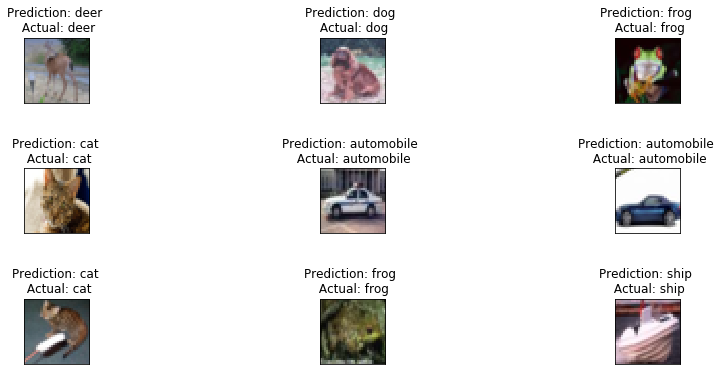

In [35]:
# create a grid of 3x3 images
fig, axs = plt.subplots(3, 3, figsize=(15, 6))
fig.subplots_adjust(hspace=1)
axs = axs.flatten()

for i, img in enumerate(batch):
    # declare label for each prediction, set title 
    for key, value in class_labels.items():
        if class_result[i] == key:
            title = 'Prediction: {} \n Actual: {}'.format(class_labels[key], class_labels[labels[i]])
            axs[i].set_title(title)
            axs[i].axes.get_xaxis().set_visible(False)
            axs[i].axes.get_yaxis().set_visible(False)
            
    # plot the image
    axs[i].imshow(img)
    
# show the plot
plt.show()